In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

from make_gaussian_data import Gauz

#### A class to generate the data ( could be much simplier )

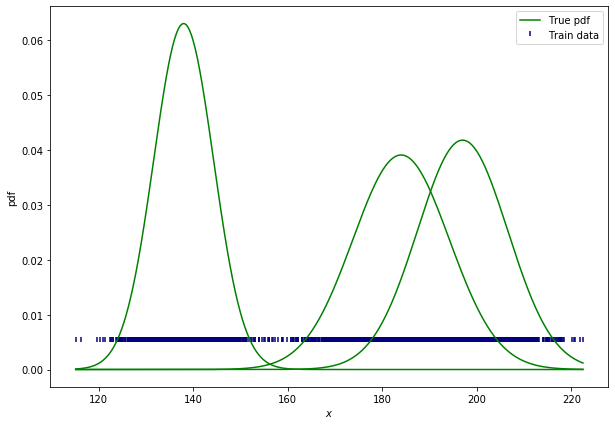

In [73]:
gg =Gauz(3, 3000)
data = gg.variables
gg.plot()

#### Calculate probability that x belongs to K-th distribution
<img src='pics/gaussian.gif'>

In [56]:
def pdf(data, mean, sigma):
    s1 = 1/(np.sqrt(2*np.pi*sigma))
    s2 = np.exp(-(np.square(data - mean)/(2*sigma)))    
    return s1 * s2

Using Bayes theorem calculate (posterior) probablity that observation belongs to Gaussian distribution with some parametres(mean and sigma) G(k), we will be updating parameters untill converges or change is less than eps. <br>
<img src='pics/bayes.gif'> 

#### Update steps: <br>
We will use our posterior probability to update parametrs and to compute our prior probability. <br><img src="pics/updates.png">
At the beginning we intialize bk = 1/k, so that any observation have equal probability to belong G(k). Also,  in real world we do not know numeber of distrubutions G(k) present in our data and we need to guess k. But in our example we know k and it makes things a bit easier.


In [80]:
# number of clusters
k = 3

bk_prior = np.ones((k)) / k  #  prior - > posterior

# random means and variances
means = np.random.choice(data, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[201.18984166 142.3109273  185.39871619] [0.75418925 0.7994464  0.42849205]


[201.18984166 142.3109273  185.39871619] [0.75418925 0.7994464  0.42849205]


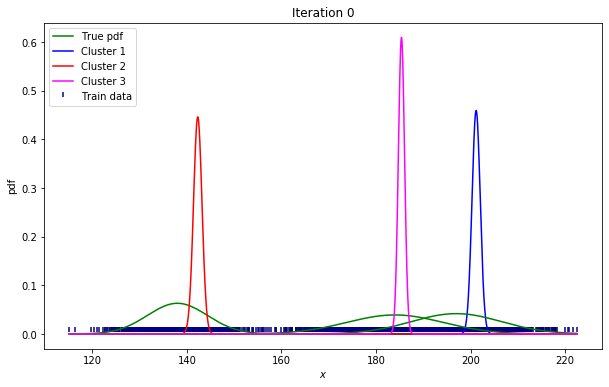

[200.48036007 141.23528031 185.62873319] [8.73583992 7.94384705 7.33465729]


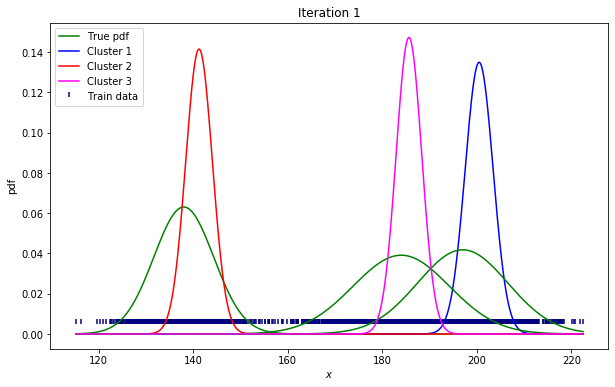

[199.41456384 139.50612772 185.52106751] [20.58607979 19.79987423 20.92992411]


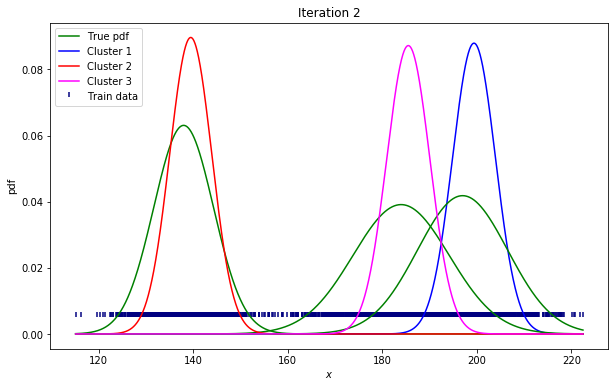

[199.55423839 138.45390454 184.35763558] [24.87130132 27.67131584 27.53306147]


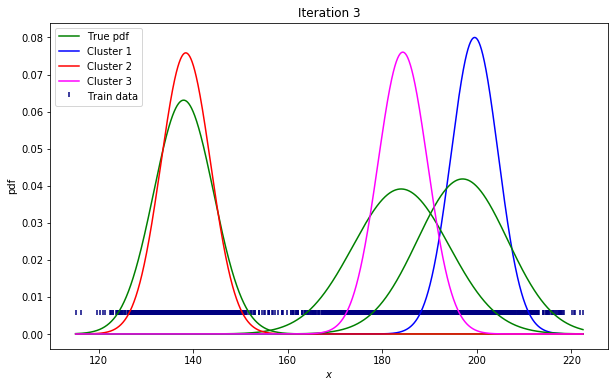

[199.48950244 138.11727674 183.64652188] [27.54720141 30.57821226 30.42388963]


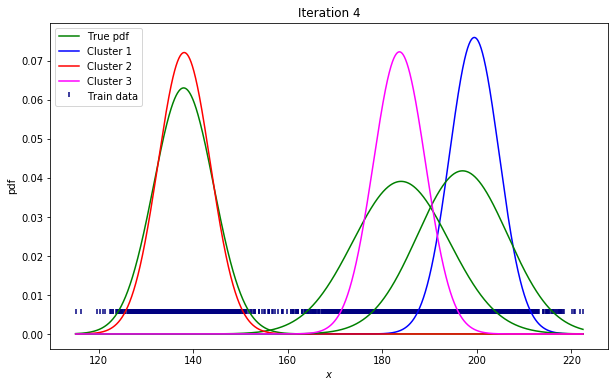

[199.32072933 138.04376247 183.19428942] [28.94167451 31.300095   31.64759012]


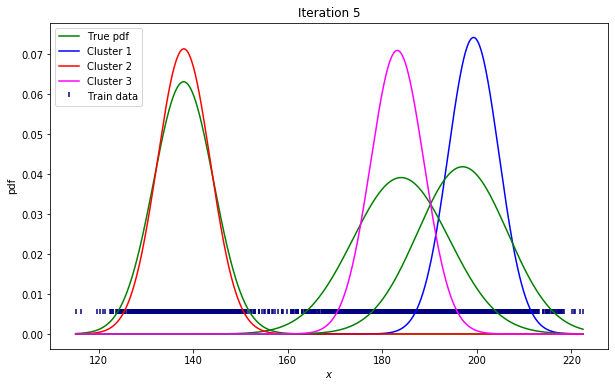

[199.13513145 138.02640605 182.85578688] [29.66143058 31.48986183 32.32583307]


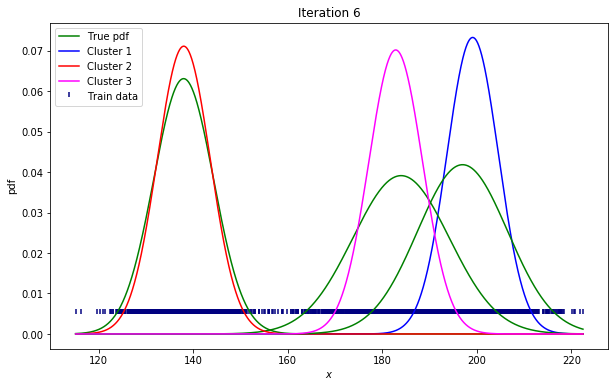

[198.96208873 138.0221603  182.58710652] [30.07753912 31.54003299 32.74076898]


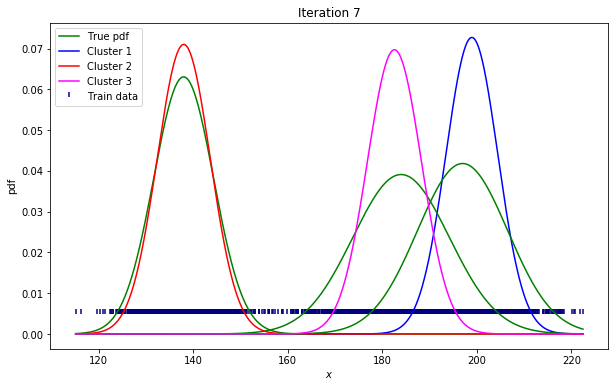

[198.8081331  138.02110444 182.37164411] [30.34949624 31.55323235 32.96679025]


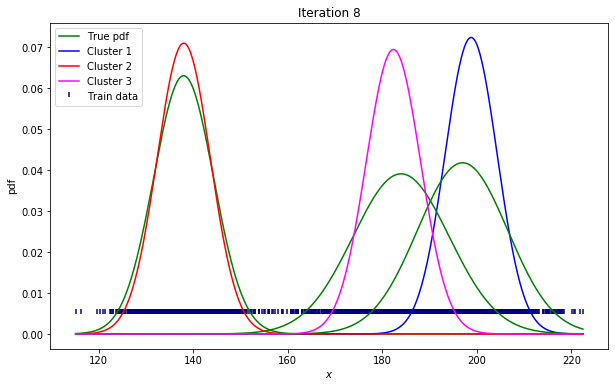

[198.67244639 138.0208392  182.19719625] [30.54397343 31.55668706 33.05267584]


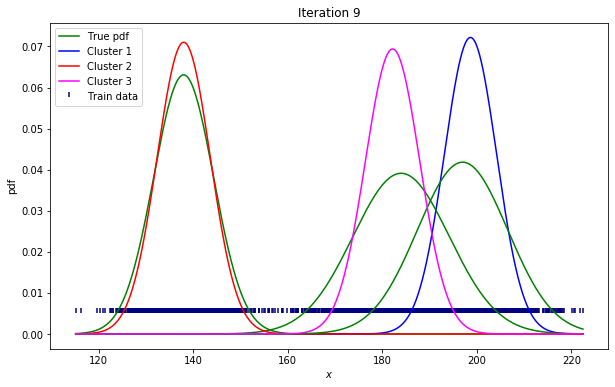

In [81]:
# to avoid division on 0
eps=1e-8 
X = data
num_steps = 10
bins = gg.bins
for step in range(num_steps):

    # small visualisaton 
    
    if step % 1 == 0:
        print(means, variances)
        plt.figure(figsize=(10,6))
        axes = plt.gca()
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.title("Iteration {}".format(step))
        plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")
        
        label="True pdf"
        
        for i, color in zip(range(k), ['blue','red','magenta']):
            plt.plot(bins, pdf(bins, gg.dists[i].m, gg.dists[i].sigma), color='green', label=label)
            plt.plot(bins, pdf(bins, means[i], variances[i]), color=color, label=f"Cluster {i+1}")
            label=None

        plt.legend(loc='upper left')
        #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
        plt.show()
    # calculate the posterior probabilites with respect to each G(k) for each observation xi in data
    x_from_gk_probability = []
    for j in range(k):
        x_from_gk_probability.append(pdf(X, means[j], np.sqrt(variances[j])))
    x_from_gk_probability = np.array(x_from_gk_probability)

    # compute posterior probabilites and update values
    bk_posterior = []
    means_prev = np.array(means)
    for j in range(k):
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generanted by each gaussian   
        full_probability_x_gaussian =  np.sum([x_from_gk_probability[i] * bk_prior[i] for i in range(k)], axis=0)
                                        
        bk_posterior.append((x_from_gk_probability[j] * bk_prior[j])/(full_probability_x_gaussian+eps))

        # updage mean and variance
        means[j] = (np.sum(bk_posterior[j] * X) / (np.sum(bk_posterior[j]+eps)))
        variances[j] = np.sum(bk_posterior[j] * np.square(X - means[j])) / (np.sum(bk_posterior[j]+eps))

        # update prior_probabilities
        bk_prior[j] = np.mean(bk_posterior[j])
#     if abs(np.sum(means_prev - np.array(means)))<eps:
#         break